In [1]:
import os
import git
from pathlib import Path
from typing import List
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import plotly.graph_objects as go
from IPython.display import clear_output
import scipy
from scipy import stats
from scipy.spatial import ConvexHull
import pylustrator
from scipy.spatial import Delaunay
from scipy.spatial import distance
from sklearn.decomposition import PCA
from tqdm import tqdm
import warnings

In [2]:
ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
data = pd.read_csv(Path(os.path.join(ROOT_DIR, 'publication', 'paper', 'CSVs', 'final_results_audio.csv')))

data.head()

,Unnamed: 0,group,dataset,subset,transform,orientation,channel,dataset_type,obs_var,var_lower,...,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma,github_plot,total_samples.1,beat_all_priors,best_prior,failure_category,failure_type,which_ones
0,0,2,ravdess,1e5geocomp,fft,NaN,female,speech,2.232949e+14,2.044359e+14,...,0.354932,0.000000e+00,0.999723,https://github.com/yashdave003/hierarchical-ba...,2880.0,1,GenGamma,NaN,NaN,NaN
1,1,5,ravdess,1e5geocomp,fft,NaN,female,speech,3.311355e+14,2.838907e+14,...,0.335270,0.000000e+00,0.667167,https://github.com/yashdave003/hierarchical-ba...,8640.0,1,GenGamma,NaN,NaN,NaN
2,2,8,ravdess,1e5geocomp,fft,NaN,female,speech,6.176871e+13,5.192469e+13,...,0.272570,0.000000e+00,0.670672,https://github.com/yashdave003/hierarchical-ba...,24480.0,1,GenGamma,NaN,NaN,NaN
3,3,11,ravdess,1e5geocomp,fft,NaN,female,speech,7.202464e+12,6.829576e+12,...,0.135410,0.000000e+00,0.999552,https://github.com/yashdave003/hierarchical-ba...,67680.0,1,GenGamma,NaN,NaN,NaN
4,4,14,ravdess,1e5geocomp,fft,NaN,female,speech,2.573510e+12,2.321575e+12,...,0.017024,1.483210e-47,0.282882,https://github.com/yashdave003/hierarchical-ba...,187200.0,1,GenGamma,NaN,NaN,NaN


In [3]:
cwt = data[data['transform'] == 'cwt']
fft = data[data['transform'] == 'fft']
stft = data[data['transform'] == 'stft']
erb = data[data['transform'] == 'erb']

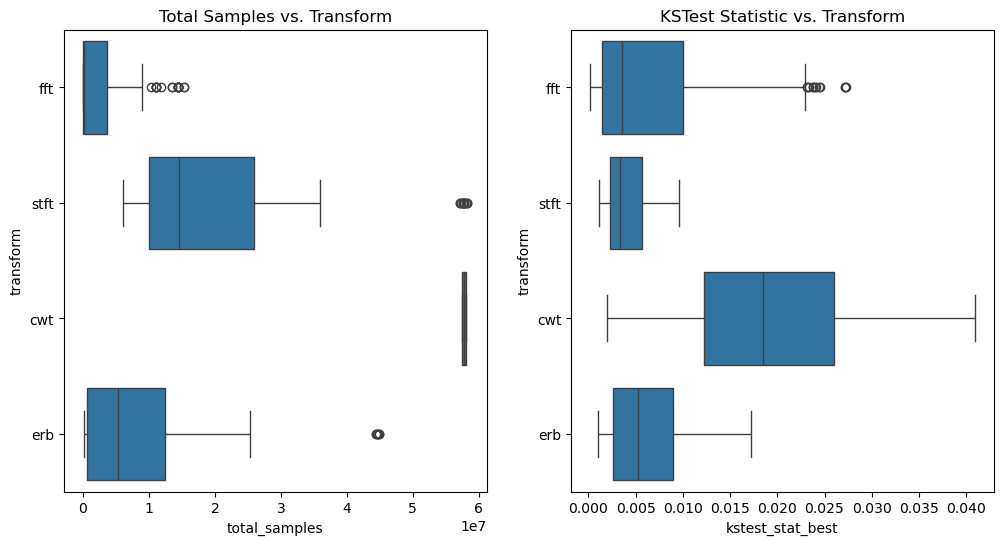

In [4]:
fig, axs = plt.subplots(ncols = 2, figsize = (12, 6))
sns.boxplot(data = data, x = 'total_samples', y = 'transform', ax = axs[0]);
axs[0].set_title('Total Samples vs. Transform');
sns.boxplot(data = data, x = 'kstest_stat_best', y = 'transform', ax = axs[1]);
axs[1].set_title('KSTest Statistic vs. Transform');

C:\Users\Henry\AppData\Local\Temp\ipykernel_8568\2469119290.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  axs[1].set_xlim(0, 1e-175);


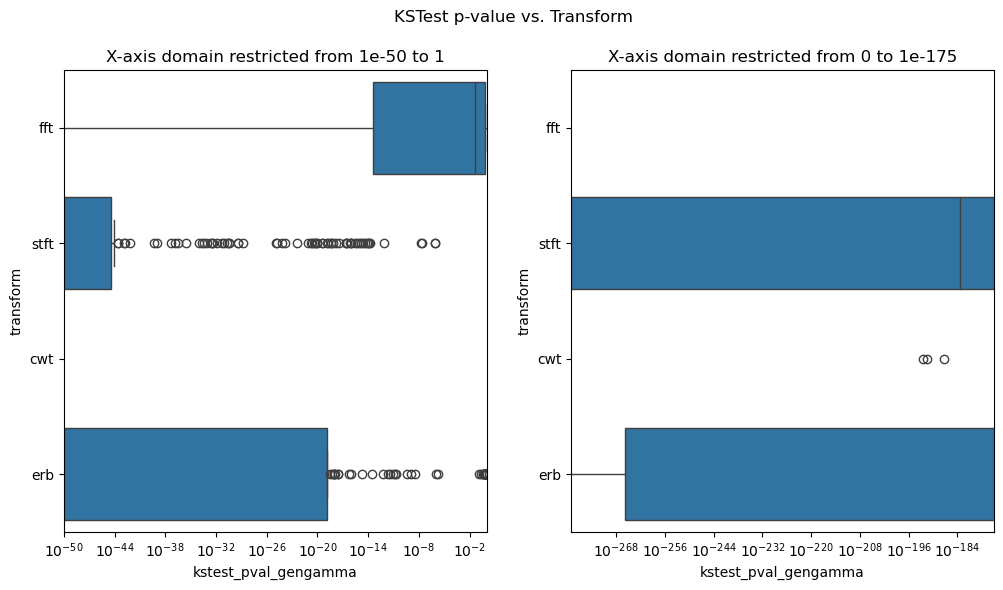

In [5]:
fig, axs = plt.subplots(ncols = 2, figsize = (12, 6))

sns.boxplot(data = data, x = 'kstest_pval_gengamma', y = 'transform', ax = axs[0]);
axs[0].set_xscale('log');
axs[0].set_xlim(1e-50, 1);
axs[0].set_title('X-axis domain restricted from 1e-50 to 1');

sns.boxplot(data = data, x = 'kstest_pval_gengamma', y = 'transform', ax = axs[1]);
axs[1].set_xscale('log');
axs[1].set_xlim(0, 1e-175);
axs[1].set_title('X-axis domain restricted from 0 to 1e-175');

fig.suptitle('KSTest p-value vs. Transform');

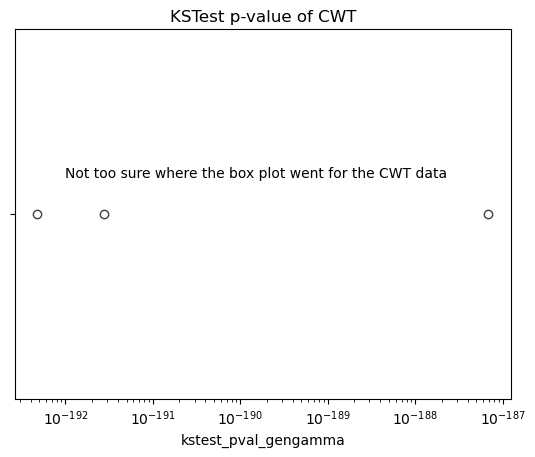

In [6]:
sns.boxplot(data = cwt, x = 'kstest_pval_gengamma');
plt.xscale('log');
plt.text(10 ** -192, -0.1, 'Not too sure where the box plot went for the CWT data')
plt.title('KSTest p-value of CWT');

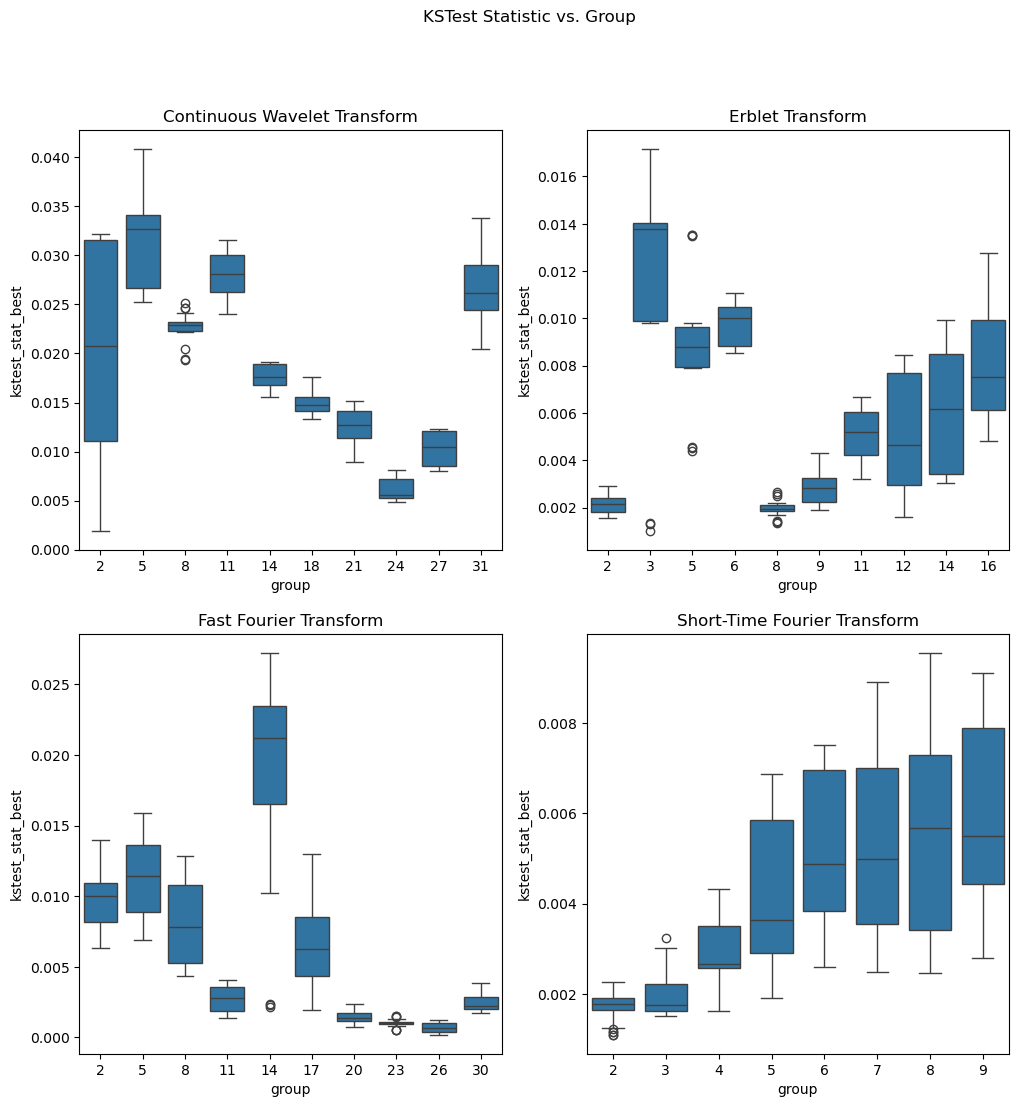

In [7]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (12, 12))
sns.boxplot(data = cwt, x = 'group', y = 'kstest_stat_best', ax = axs[0,0]);
axs[0,0].set_title('Continuous Wavelet Transform');
sns.boxplot(data = erb, x = 'group', y = 'kstest_stat_best', ax = axs[0,1]);
axs[0,1].set_title('Erblet Transform');
sns.boxplot(data = fft, x = 'group', y = 'kstest_stat_best', ax = axs[1,0]);
axs[1,0].set_title('Fast Fourier Transform');
sns.boxplot(data = stft, x = 'group', y = 'kstest_stat_best', ax = axs[1,1]);
axs[1,1].set_title('Short-Time Fourier Transform');

fig.suptitle('KSTest Statistic vs. Group');